#### **Problem Statement:**

**Project Title:** Customer Segmentation and Purchase Behavior Prediction for Retail Businesses

**Problem Statement:** Purchase Behavior Prediction at Segment-Level: Using Demographic and Transactional Data to Identify Trends in Retail Customer Purchases Across Different Categories.

**Objective:** Develop a predictive model that forecasts purchase behavior not for individual customers, but for similar customer segments (e.g., age group, gender, location).

**Importance:** This approach allows retailers to predict overall category-level demands and tailor marketing or stocking strategies to different customer demographics, even without repeated customer interactions.

#### **Ask Questions:**

#### **Adnan Shahid Sadar(50592332)**

**Question 1:** How do age and gender affect customer preferences for different product categories?

Hypotheses: Younger customers may prefer fashion items, while older customers may lean toward household products. Gender might also influence the likelihood of purchasing specific categories.

Significance: This question helps identify demographic factors driving purchasing decisions. Retailers can use these insights for targeted marketing and product stocking strategies.

**Question 2:** Do customers in different locations (shopping malls) show distinct purchasing behaviors?

Hypotheses: Customers from malls located in urban areas may buy higher-priced products compared to those in suburban or rural areas.

Significance: Retailers could optimize inventory management based on regional preferences, leading to better resource allocation and increased sales.


#### **Mohammed Abdul Aftab Muddassir(50604245)**

**Question 1:** Which product categories are generating the highest sales, indicating a need for potential adjustments in stocking strategies?

Hypothesis: Understanding which product categories are generating the highest sales allows businesses to pinpoint their top-performing items. By knowing which categories are selling well, businesses can adjust their stocking strategies to ensure that high-demand items are adequately stocked. This helps prevent stockouts, reducing lost sales opportunities, and overstock situations that lead to increased holding costs.

Significance:	Sales data can guide product development efforts. If certain categories are performing well, businesses can explore expanding their offerings within those categories, introducing new variations or complementary products to meet consumer demand.

**Question 2:**  How do the revenue trends across different quarters in 2021 and 2022 compare, and how can quarterly performance of past years be helpful to plan for the future of business?

Hypothesis:  Understanding the revenue performance across different quarters provides valuable insights into seasonal trends and purchasing behaviors. Businesses can use this information to identify peak periods for sales and plan inventory and marketing strategies accordingly. 

Significance:  Analyzing quarterly revenue differences can help evaluate the impact of marketing campaigns, product launches, and economic conditions on sales. If one year outperforms another in a specific quarter, it may indicate the effectiveness of certain strategies or changes in consumer preferences. It can also help in resource allocation, Future Forecasting and gaining Investor Confidence.


#### **Rachana Ramesh(50596083)**

**Question 1:** How do demographic factors (like gender and age) influence purchasing behaviour in different categories?
Hypotheses: 
1. Female customers are more likely to purchase clothing and beauty products compared to male customers
2. Customers of age 18-30 prefer purhcasing technology and gadgets, while customer of age 50+ tend to buy helath related products.

Significane: Understanding how demographic factors affect the purchasing behaviour can help the business to adapt to their marketing strategies and product offerings. Different demographic groups like different products understanding this can be useful target advertising and in manging inventory.

**Question 2:** What is the relationship between payement method and purchasing vloume in different shopping malls? 
Hypotheses: 
1. Customers who use credit cards or debit cards tend to purchase a higher quantity of items compared to those using cash.
2. Certain shopping malls show a preference for specific payment methods, which affects overall sales performance. 

Significane: Understanding how different payment methods impact purhcasing behaviour can provide insights into customer preferences and shopping habits. It will also guide the business in offering most preferred payment methods and improve the overall shopping experience.

#### **Data Cleaning/Data Retrieval:**

In [184]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [185]:
# Load the dataset
df = pd.read_csv('customer_shopping_data.csv')

In [186]:
df.describe()

,age,quantity,price
count,99453.000000,99457.000000,99457.000000
mean,43.432134,3.003429,689.256321
std,15.008140,1.413025,941.184567
min,2.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,155.000000,5.000000,5250.000000


In [187]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Location
0,I138884,C241288,Female,28.0,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,Sisli
1,I317333,C111565,NaN,21.0,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,Bayrampasa
2,I127801,C266599,Male,20.0,Clothing,1,300.08,Cash,9/11/2021,Metrocity,Besiktas
3,I173702,C988172,Female,66.0,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,Atasehir
4,I337046,C189076,Female,53.0,Books,4,60.60,Cash,24/10/2021,Kanyon,Sisli


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99446 non-null  object 
 3   age             99453 non-null  float64
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99454 non-null  object 
 10  Location        99454 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.3+ MB


**Printing the shape:**

In [189]:
df.shape

(99457, 11)

 **1. Check for duplicated values and remove them if any are found:**

In [190]:
df.duplicated().sum()

0

**Check for null values:**

In [191]:
print(df.isnull().sum())

invoice_no         0
customer_id        0
gender            11
age                4
category           0
quantity           0
price              0
payment_method     0
invoice_date       0
shopping_mall      3
Location           3
dtype: int64


We can see that our dataset has columns with null values

Now, we have the option to either drop records having null values or impute them with mean, median, mode

In [192]:
print(df.describe())

                age      quantity         price
count  99453.000000  99457.000000  99457.000000
mean      43.432134      3.003429    689.256321
std       15.008140      1.413025    941.184567
min        2.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max      155.000000      5.000000   5250.000000


#### **Handling Missing Entries**

In [193]:
df = df.dropna(subset=['gender'])

median_age = df['age'].median()
df["age"]=df['age'].fillna(median_age)

df = df.dropna(subset=['shopping_mall'])

print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
Location          0
dtype: int64


Age: We have decided to impute this data with mean as the age data is typically not heavily skewed, so the mean provides a sensible replacement for missing values.

Gender: We have decided to drop missing records in this column because the number of missing records are less compared to the total number of records.

Store Location: Dropping missing records seemed like a better option as the missing records were less, and imputing doesn't really improve the quality of the dataset

#### **Handling Mismatched string formats**

In [194]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of type string
        all_title_case = df[column].str.istitle().all()
        
        if all_title_case:
            print(f"All strings in column '{column}' are in title case.")
        else:
            print(f"Not all strings in column '{column}' are in title case.")

All strings in column 'invoice_no' are in title case.
All strings in column 'customer_id' are in title case.
Not all strings in column 'gender' are in title case.
Not all strings in column 'category' are in title case.
All strings in column 'payment_method' are in title case.
Not all strings in column 'invoice_date' are in title case.
Not all strings in column 'shopping_mall' are in title case.
All strings in column 'Location' are in title case.


4 columns in the dataset have mismatched string formats

We will be ignoring the 'invoice_date' column and handling the mismatched string formats for other columns

In [195]:
df["gender"] = df["gender"].str.title()
df["category"] = df["category"].str.title()
df["shopping_mall"] = df["shopping_mall"].str.title()

In [196]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of type string
        all_title_case = df[column].str.istitle().all()
        
        if all_title_case:
            print(f"All strings in column '{column}' are in title case.")
        else:
            print(f"Not all strings in column '{column}' are in title case.")

All strings in column 'invoice_no' are in title case.
All strings in column 'customer_id' are in title case.
All strings in column 'gender' are in title case.
All strings in column 'category' are in title case.
All strings in column 'payment_method' are in title case.
Not all strings in column 'invoice_date' are in title case.
All strings in column 'shopping_mall' are in title case.
All strings in column 'Location' are in title case.


All mismatched strings in the columns have been handled now

#### **Handling Outliers**

In [197]:
print(df.describe())

                age      quantity         price
count  99443.000000  99443.000000  99443.000000
mean      43.432197      3.003439    689.290403
std       15.007765      1.413021    941.188540
min        2.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max      155.000000      5.000000   5250.000000


As we can see, 1 column: Age consists of outliers

In [198]:
# Handle outliers using IQR method and imputing them with median

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

df.loc[(df["age"] < lower_bound) | (df["age"] > upper_bound), "age"] = df["age"].median()

print(df.describe())

                age      quantity         price
count  99443.000000  99443.000000  99443.000000
mean      43.427411      3.003439    689.290403
std       14.989238      1.413021    941.188540
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


For handling outliers in the 'Age' column, we have reduced the IQR multiplier to raise the lower bound.

This has been done because the lower bound was being calculated as a negative number when using the multiplying factor of 1.5.

#### Converting features with string datatype to categorical

In [199]:
# Apply one-hot encoding to the dataset
df_encoded = pd.get_dummies(df, columns=['gender', 'category', 'payment_method','shopping_mall','Location'], drop_first=True)
correlation_df = df_encoded.drop(columns=['invoice_date','invoice_no','customer_id'],axis=1).corr()
print(df_encoded)

      invoice_no customer_id   age  quantity    price invoice_date  \
0        I138884     C241288  28.0         5  1500.40     5/8/2022   
2        I127801     C266599  20.0         1   300.08    9/11/2021   
3        I173702     C988172  66.0         5  3000.85   16/05/2021   
4        I337046     C189076  53.0         4    60.60   24/10/2021   
5        I227836     C657758  28.0         5  1500.40   24/05/2022   
...          ...         ...   ...       ...      ...          ...   
99452    I219422     C441542  45.0         5    58.65   21/09/2022   
99453    I325143     C569580  27.0         2    10.46   22/09/2021   
99454    I824010     C103292  63.0         2    10.46   28/03/2021   
99455    I702964     C800631  56.0         4  4200.00   16/03/2021   
99456    I232867     C273973  36.0         3    35.19   15/10/2022   

       gender_Male  category_Clothing  category_Cosmetics  \
0            False               True               False   
2             True               True

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

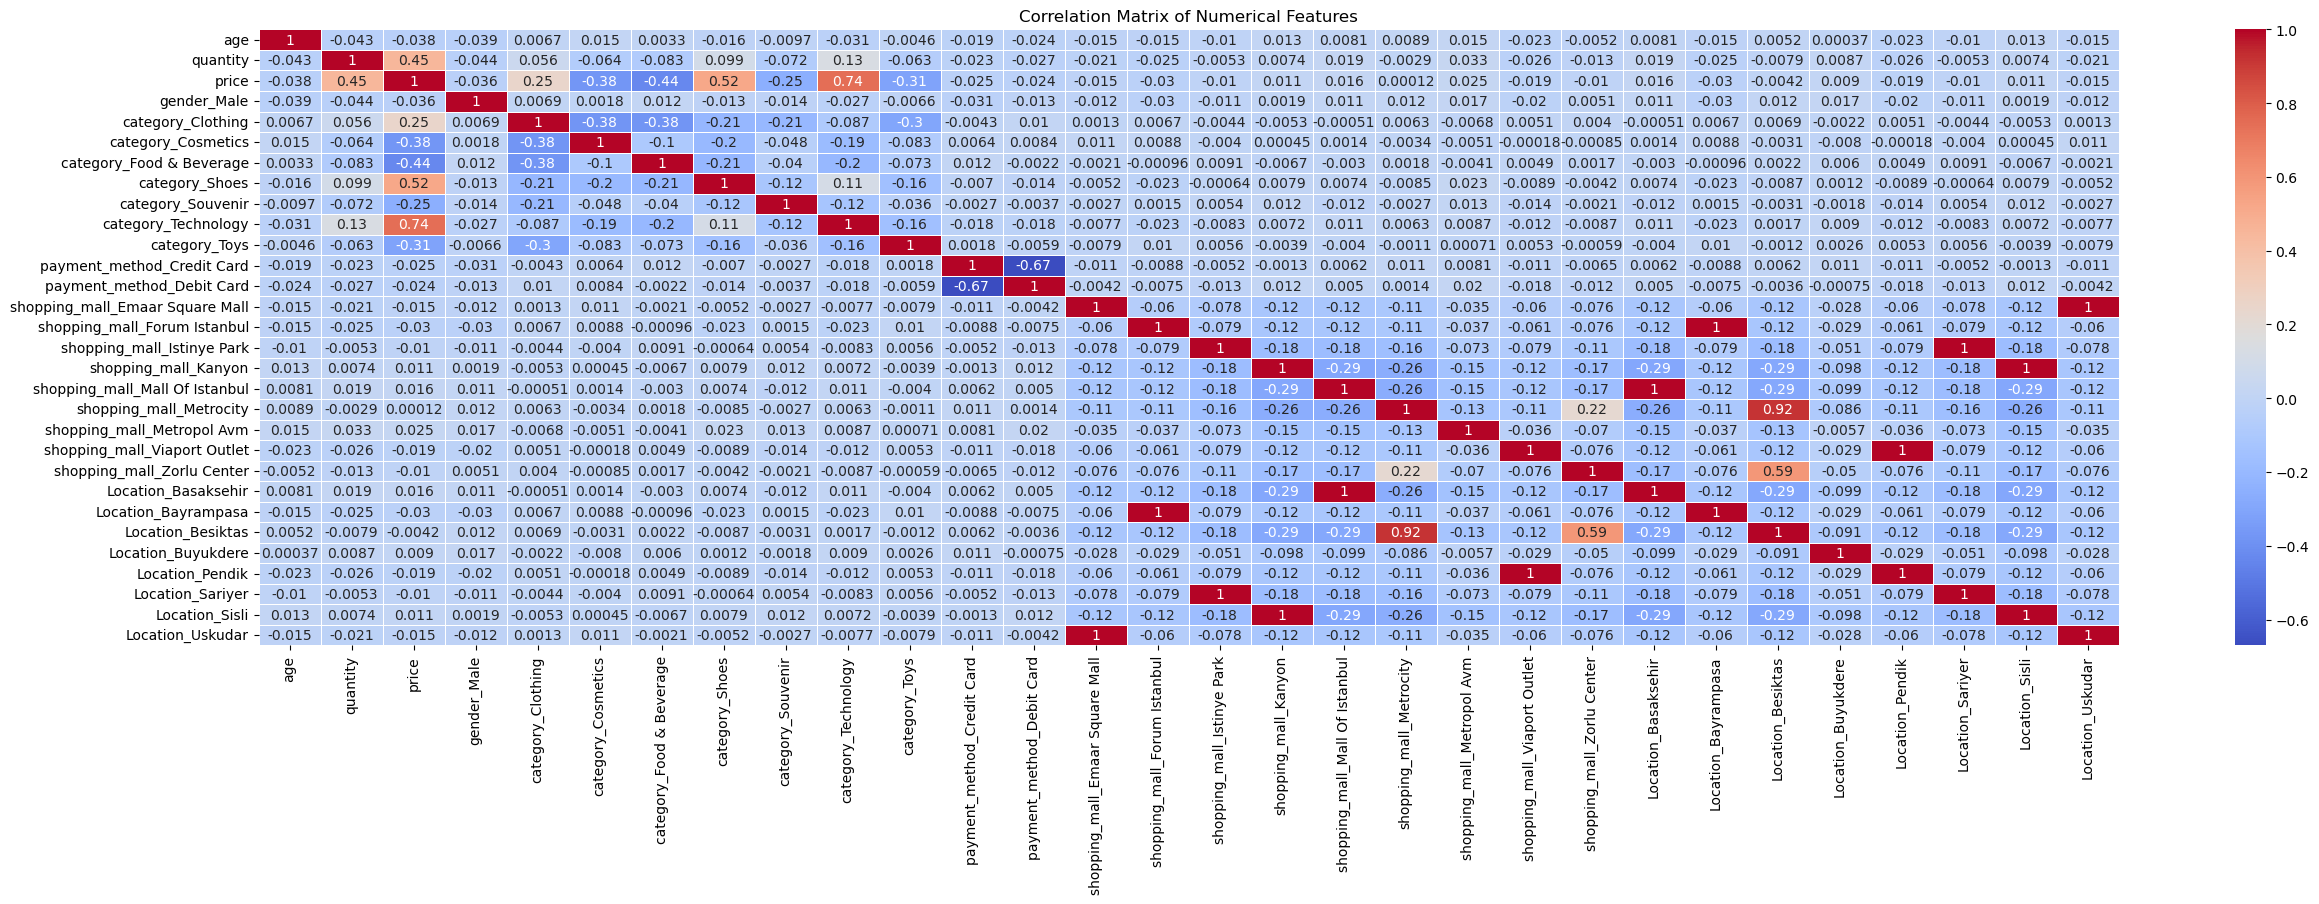

In [200]:
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')

#### **Normalization**

In [201]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_columns = ['quantity', 'price', 'age']  

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print(df_encoded.head())


  invoice_no customer_id       age  quantity     price invoice_date  \
0    I138884     C241288  0.196078      1.00  0.285078     5/8/2022   
2    I127801     C266599  0.039216      0.00  0.056218    9/11/2021   
3    I173702     C988172  0.941176      1.00  0.571163   16/05/2021   
4    I337046     C189076  0.686275      0.75  0.010557   24/10/2021   
5    I227836     C657758  0.196078      1.00  0.285078   24/05/2022   

   gender_Male  category_Clothing  category_Cosmetics  \
0        False               True               False   
2         True               True               False   
3        False              False               False   
4        False              False               False   
5        False               True               False   

   category_Food & Beverage  ...  shopping_mall_Viaport Outlet  \
0                     False  ...                         False   
2                     False  ...                         False   
3                     False  ...

All numerical columns in the dataset 

#### **Exploratory Data Analysis:**

#### **Adnan Shahid Sadar (50592332)**

**Hypothesis 1:**
Customers' age and gender influence their preferences for product categories.

**EDA Step:** Group the data by age and gender, and compute the counts or proportions of purchases in different category groups.

**Outcome:** This can help identify the most common product categories for each gender and age range.

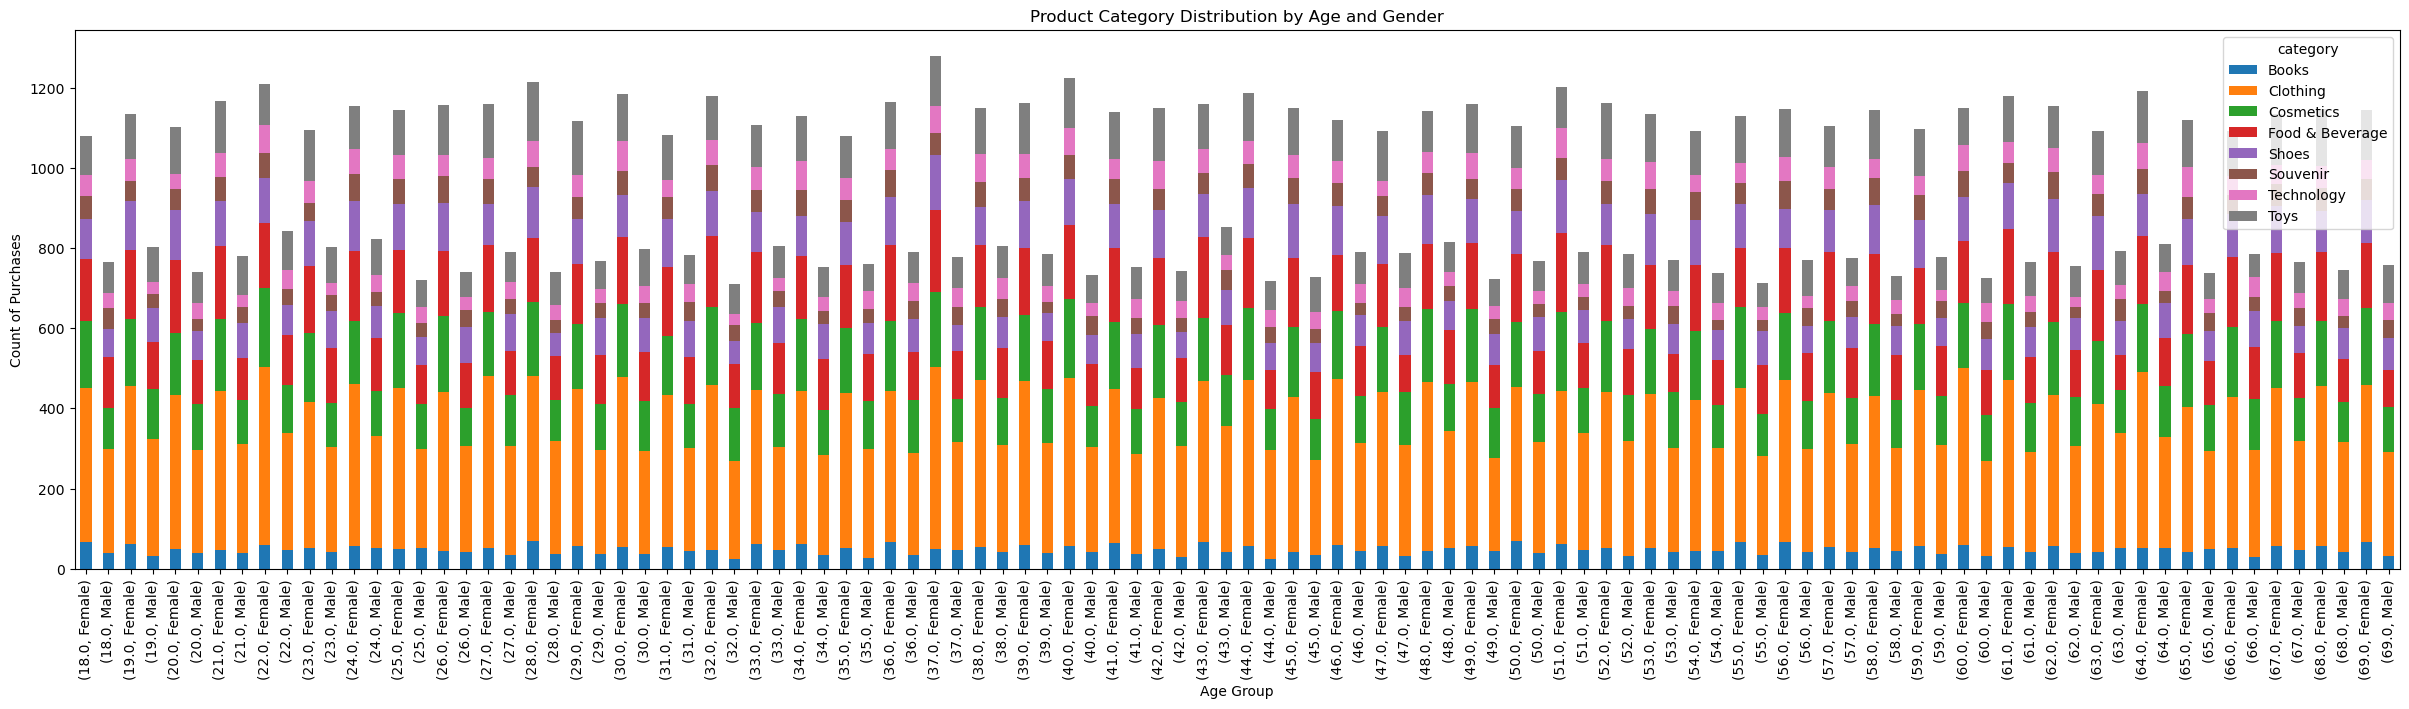

In [202]:
category_by_age_gender = df.groupby(['age', 'gender', 'category']).size().unstack().fillna(0)
category_by_age_gender.plot(kind='bar', stacked=True, figsize=(30, 7))
plt.title('Product Category Distribution by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count of Purchases')
plt.show()

Chi-Square Test for Categorical Features:

**EDA Step:** Perform a statistical test to see if there is a significant relationship between age/gender and product category.

**Outcome:** Understanding if there is a statistically significant dependence will help decide if these columns are important features for the model.

**Learnings & Feature Engineering:**

If age and gender significantly impact category preferences, we can keep them for modeling. Otherwise, we may consider dropping or reducing these features

In [203]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['category'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, P-value: {p_value}")


Chi-Square: 7.652540250750684, P-value: 0.36422683408825485


**Hypothesis 2:**
Customers from different locations exhibit distinct purchasing behaviors.

**EDA Step:** Group data by Location and category to observe purchase distributions in different locations.

**Outcome:** Detect which locations drive purchases for certain product categories.

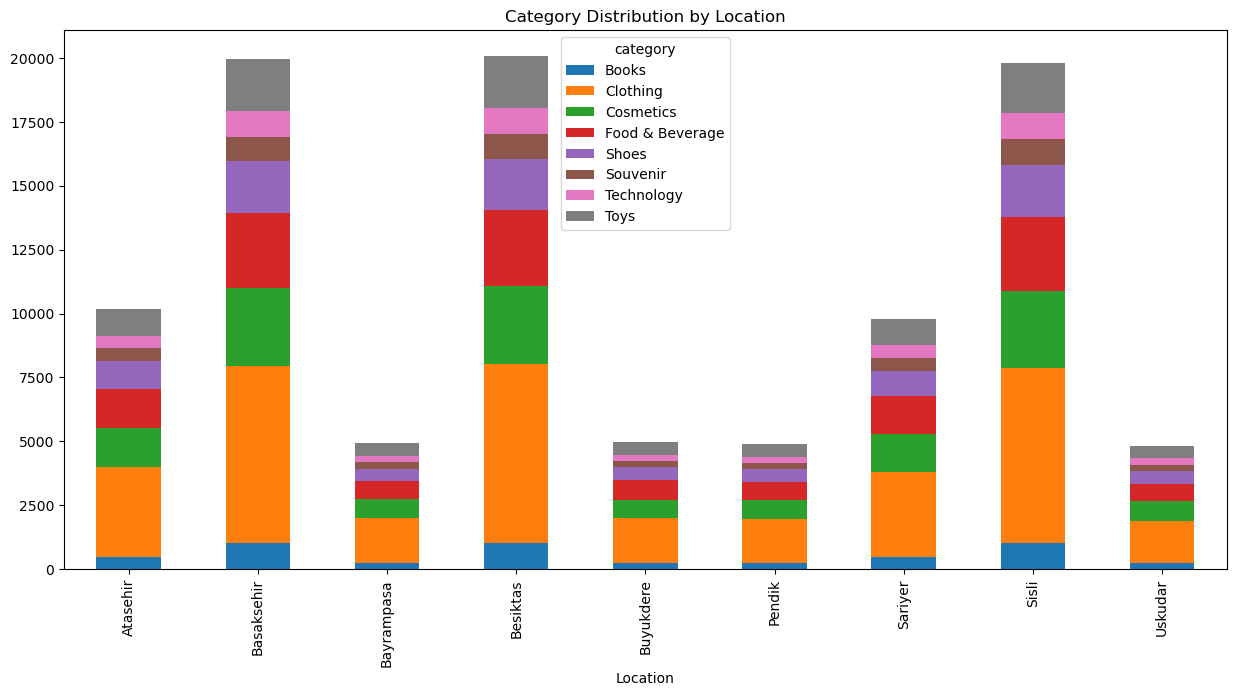

In [204]:
location_by_category = df.groupby(['Location', 'category']).size().unstack().fillna(0)
location_by_category.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Category Distribution by Location')
plt.show()

Perform an ANOVA (Analysis of Variance) to check if there’s any statistical difference in the mean quantity purchased across locations.

**Learnings & Feature Engineering:**

If the location has a significant effect on the purchase behavior, keep the Location feature for prediction. Otherwise, consider dropping or simplifying it.

In [205]:
from scipy.stats import f_oneway
mall_groups = [df[df['Location'] == mall]['quantity'] for mall in df['Location'].unique()]
f_stat, p_value = f_oneway(*mall_groups)

print(f"ANOVA F-statistic: {f_stat}, P-value: {p_value}")


ANOVA F-statistic: 0.413762863674586, P-value: 0.9134145050080709


#### **Mohammed Abdul Aftab Muddassir (50604245)**

Hypothesis 1: Categories which are selling well will need to adjust their stocking strategies to ensure that high-demand items are adequately stocked and prevent loss due to stockouts. This will also help to restrategize the categories which are performing low.

EDA Step: Calculating total revenue by multiplying quantity of a product with its price and plotting a bar graph to check which category is generating the most revenue. 

Output: From the output we get to know that 'Clothes' catogery is performing the highest, so it is logical to invest more to fill clothes inventory. This is followed by 'Shoes' and 'Technology' category subsequently. From the output we can also see that 'Food and Beverages' category can be improved as this is an essential category and if planned properly we can improve sales significantly.

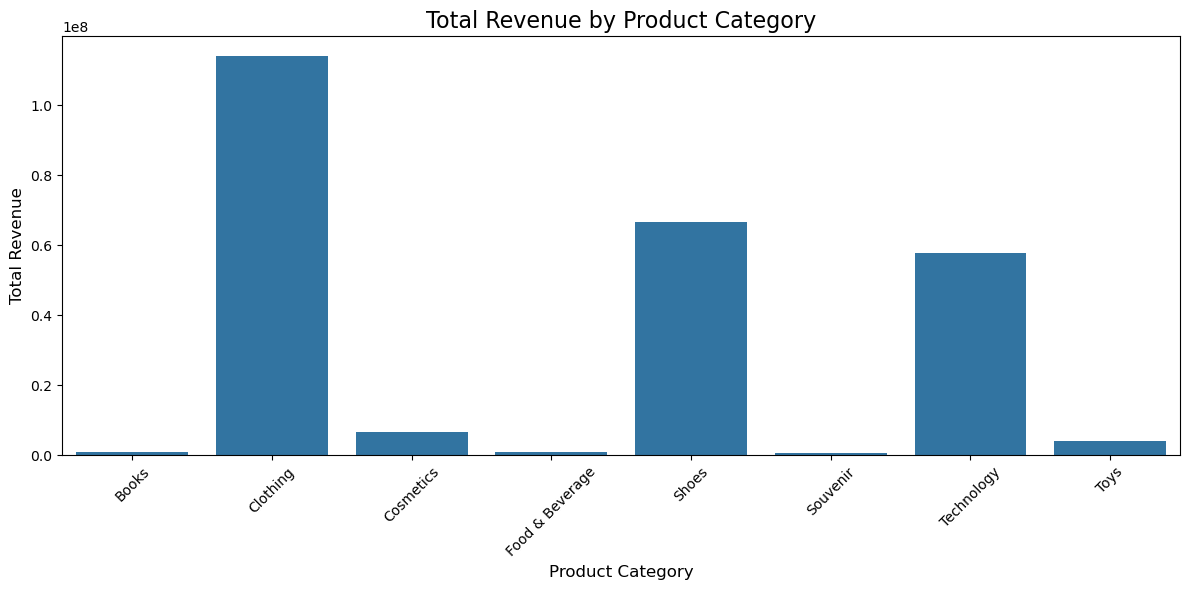

In [206]:
# Calculate total revenue by category
df['total_revenue'] = df['quantity'] * df['price']
category_revenue = df.groupby('category')['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Create a bar plot for category-wise revenue
sns.barplot(x='category', y='total_revenue', data=category_revenue)

# Add labels and title
plt.title('Total Revenue by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

Hypothesis 2: By Observing the revenue trends of past years over each quarter, we can get valuable insights into seasonal trends and purchasing behaviors. This information can be used by businesses to identify peak periods for sales and plan marketing strategies accordingly

EDA Steps: 
1.Changing the date format to date first, then filtering the main data frame to get 2021 and 2022 data. 
2.Assigning quarters to all the dates in the filtered data frame and calculating total revenue by multiplying quantity and price. 
3.Grouping the filtered data frame based on quarter and adding up the revenue in that particular quarter.
4.Plotting the graph for the grouped data.

Output: From the output we can observe that revenue in the 2022 quarters is negligibly higher than 2021. This means that business is stagnant and to flourish in the future years it needs strategic planning and execution. The country can introduce long holidays for its people so that it can boost the sales during festive seasons and inturn will help to grow the economy of the country.


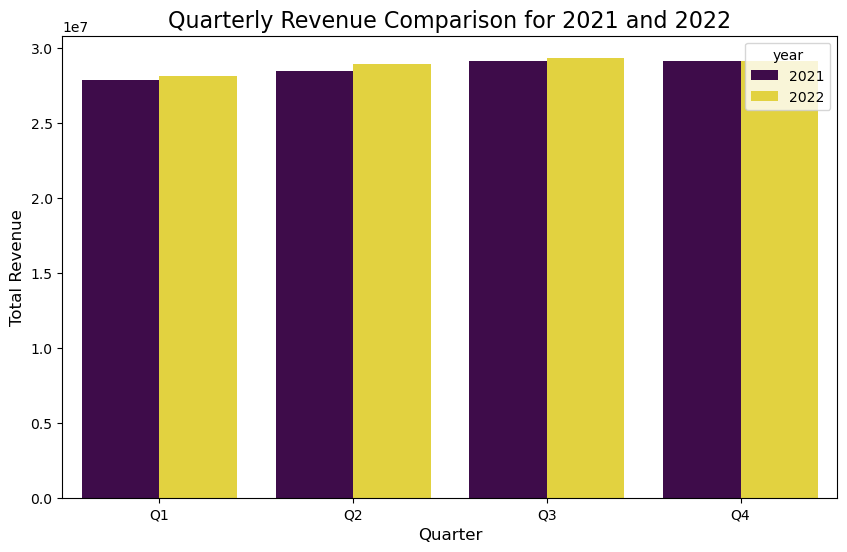

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure invoice_date is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Filter data for the years 2021 and 2022 and create a copy
df_filtered = df[df['invoice_date'].dt.year.isin([2021, 2022])].copy()

# Define a function to assign each month to a quarter
def assign_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Apply the quarter assignment based on the month
df_filtered['quarter'] = df_filtered['invoice_date'].dt.month.apply(assign_quarter)

# Calculate total revenue for each quarter of 2021 and 2022
df_filtered['total_revenue'] = df_filtered['quantity'] * df_filtered['price']
quarterly_revenue = df_filtered.groupby([df_filtered['invoice_date'].dt.year, 'quarter'])['total_revenue'].sum().reset_index()

# Rename columns for clarity
quarterly_revenue.columns = ['year', 'quarter', 'total_revenue']

# Plot the revenue comparison across quarters for 2021 and 2022
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='total_revenue', hue='year', data=quarterly_revenue, palette='viridis')

# Add labels and title
plt.title('Quarterly Revenue Comparison for 2021 and 2022', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Show the plot
plt.show()


**Rachana Ramesh (50596083)**

Hypothesis 1.1: Female customers are more likely to purchase clothing and beauty products compared to male customers

EDA Steps: 
1. Analyse the total quantity of items purchased by each gender for different product categories
2. Create a bar chart to visualzie the quantity purchased across categories by gender.

Output: The chart displays the total quantity purchased in each category by gender.

gender  category       
Female  Books               8772
        CLOTHING               5
        Clothing           62028
        Cosmetics          27261
        Food & Beverage    26353
        Shoes              17905
        Souvenir            8962
        TECHNOLOGY             3
        TOYS                   3
        Technology          8974
        Toys               18359
        clothing               2
MALE    Clothing               4
Male    Books               6206
        Clothing           41507
        Cosmetics          18200
        Food & Beverage    17915
        SHOES                  4
        Shoes              12304
        Souvenir            5894
        Technology          6044
        Toys               11954
        cosmetics              1
        souvenir               1
female  Clothing               3
        Food & Beverage        2
        Souvenir               5
male    Clothing               8
        Toys                   5
Name: quantity, dty

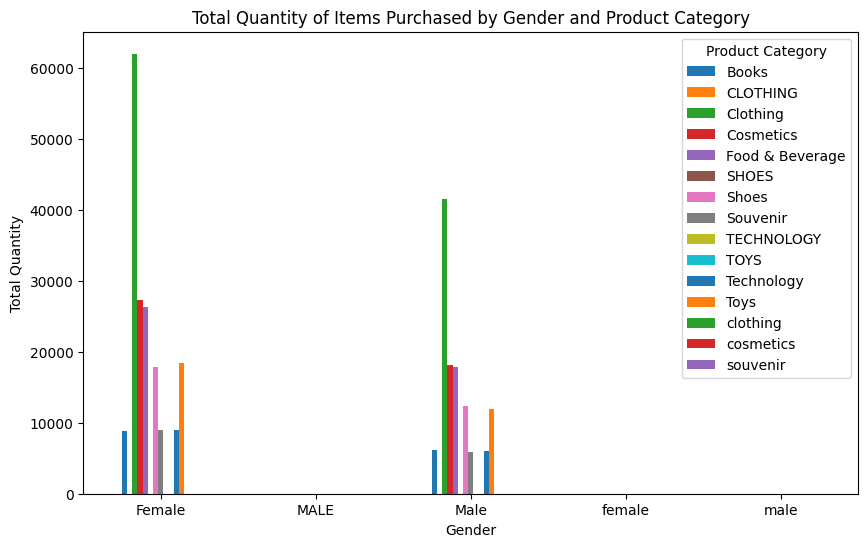

In [20]:
quantity_by_gender_category = df.groupby(['gender', 'category'])['quantity'].sum()
print(quantity_by_gender_category)

quantity_by_gender_category.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Total Quantity of Items Purchased by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()


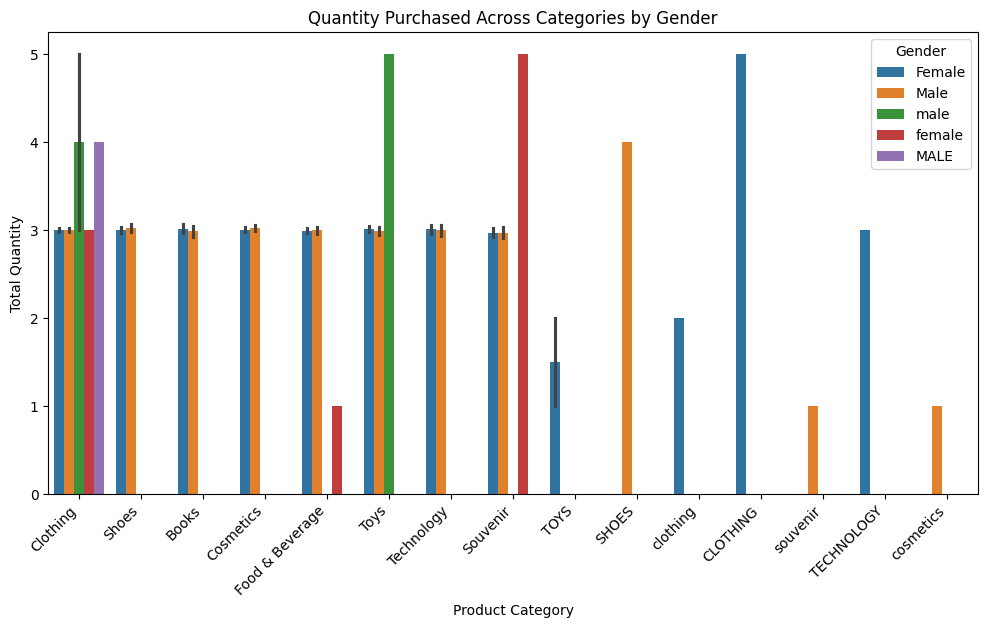

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='quantity', hue='gender', data=df)
plt.title('Quantity Purchased Across Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


Learning and feature: If there is a notable increase in the buying of clothing and beauty products by female customers, it provides evidence for the theory. Otherwise, it indicates a need to explore other factors influencing purchasing behaviour. Keep the gender and category columns for further analysis modeling

Hypothesis 1.2: Customers of age 18-30 prefer purhcasing technology and gadgets, while customer of age 50+ tend to buy helath related products.

EDA Steps:
1. Create age groups (e.g., 18-30, 31-50, 51+) and analyse the total quantity of items purchased in different categories by age group.
2. Use a box plot to show the distribution of purchases across categories for each age group.

Outcome: The box plot reveals the purchasing distribution for each category by age group

C:\Users\racha\AppData\Local\Temp\ipykernel_7816\79897137.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_by_age_category = df.groupby(['age_group', 'category'])['quantity'].sum()


age_group  category       
18-30      Books               3556
           CLOTHING               0
           Clothing           24073
           Cosmetics          10248
           Food & Beverage    10147
           SHOES                  0
           Shoes               7139
           Souvenir            3467
           TECHNOLOGY             0
           TOYS                   2
           Technology          3330
           Toys                7272
           clothing               0
           cosmetics              1
           souvenir               0
31-50      Books               5660
           CLOTHING               5
           Clothing           39816
           Cosmetics          17695
           Food & Beverage    17287
           SHOES                  4
           Shoes              11586
           Souvenir            5761
           TECHNOLOGY             3
           TOYS                   1
           Technology          6033
           Toys               11522
 

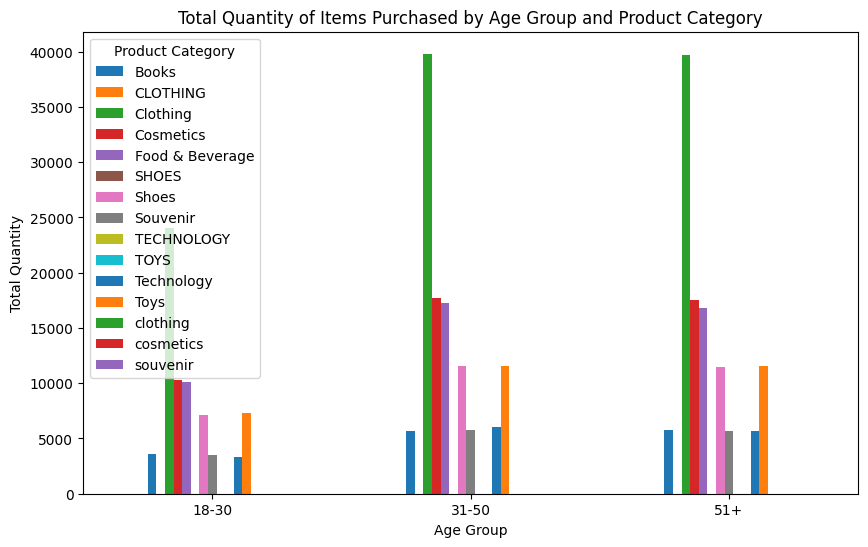

In [22]:
bins = [18, 30, 50, float('inf')]
labels = ['18-30', '31-50', '51+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

quantity_by_age_category = df.groupby(['age_group', 'category'])['quantity'].sum()

print(quantity_by_age_category)

quantity_by_age_category.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Total Quantity of Items Purchased by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()


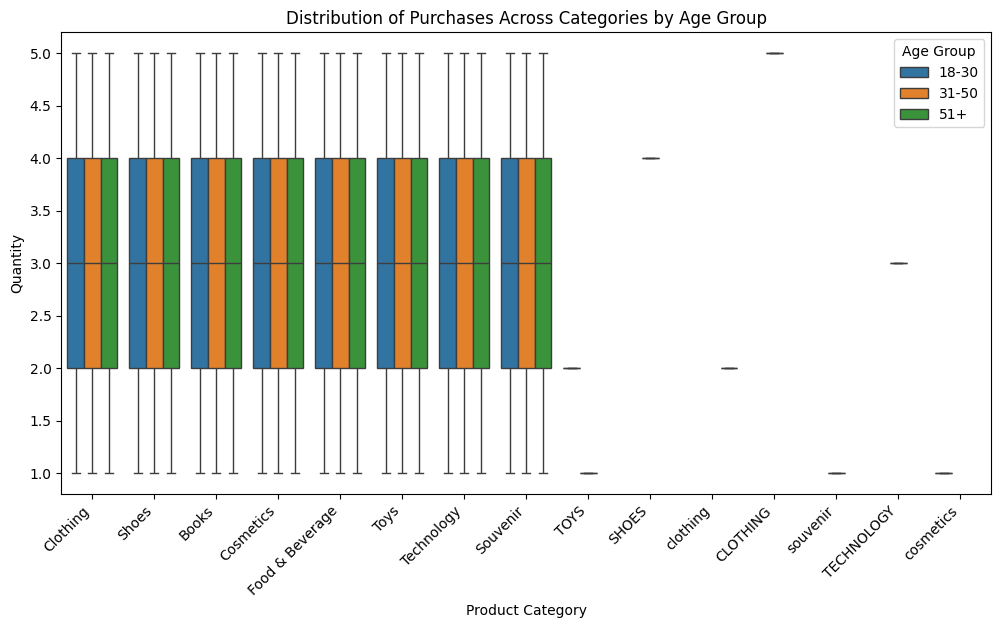

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='quantity', hue='age_group', data=df)
plt.title('Distribution of Purchases Across Categories by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.show()


Learning and feature: If technology is mainly bought by younger customers, then the hypothesis is validated. If older customers tend to favor home goods, it indicates their purchasing habits. Use 'age_group' for segmentation in further analysis.

Hypothesis 2.1: Customers who use credit or debit cards tend to purchase a higher quantity of items compared to those using cash.

EDA steps: 
1. Analyse the total quantity of items purchased by each payment method.
2. Create a pie chart to represent the share of total purchases by payment method.

Outcome: The pie chart shows the distribution of purchases across payment methods.

payment_method
Cash           133370
Credit Card    105045
Debit Card      60297
Name: quantity, dtype: int64


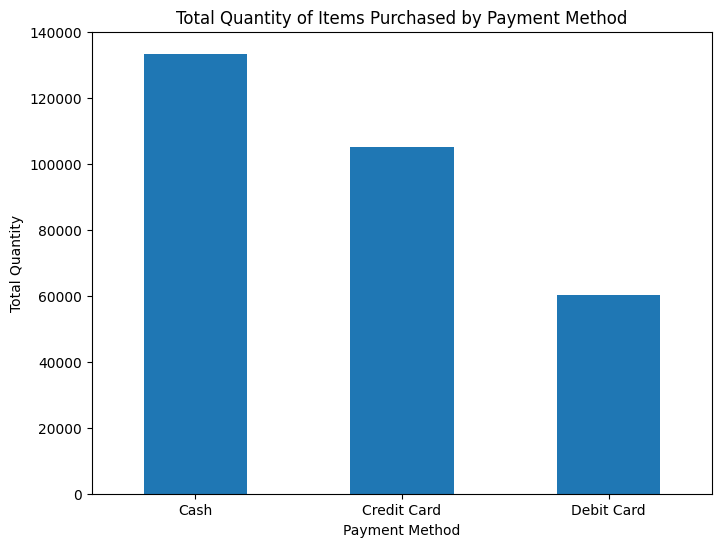

In [25]:
quantity_by_payment_method = df.groupby('payment_method')['quantity'].sum()

print(quantity_by_payment_method)

quantity_by_payment_method.plot(kind='bar', figsize=(8, 6))
plt.title('Total Quantity of Items Purchased by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
plt.show()


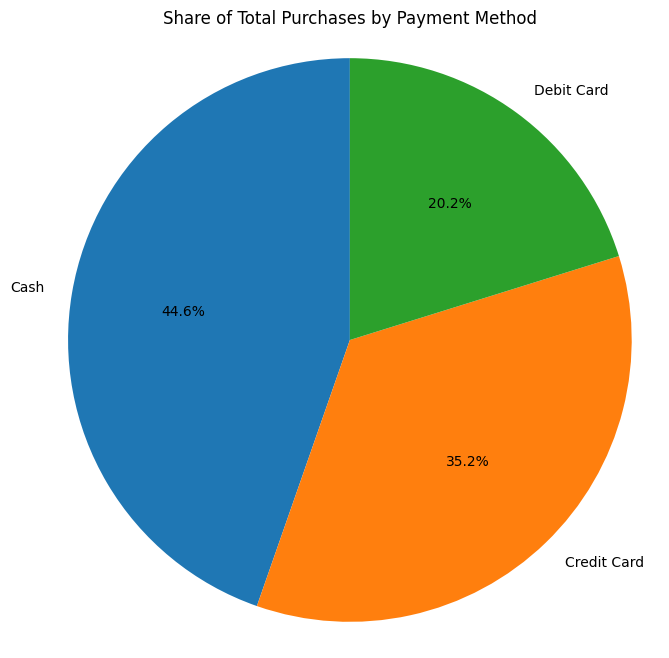

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(quantity_by_payment_method, labels=quantity_by_payment_method.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Total Purchases by Payment Method')
plt.axis('equal') 
plt.show()


Learning and feature: A higher percentage for credit/debit card usage indicates that customer is using these method of purchase. Keep 'payment_method' for further analysis, as it is significant in understanding customer behaviour.

Hypothesis 2.2: Certain shopping malls show a preference for specific payment methods, influencing overall sales performance.

EDA steps:
1. Analyse the total sales volume in each shopping mall by payment method.
2. Create a heatmap to show the relationship between shopping malls and preferred payment methods.

Outcome: The heatmap indicates how different shopping malls prefer certain payment methods.

shopping_mall      payment_method
Cevahir AVM        Cash              1519323.38
                   Credit Card       1202292.16
                   Debit Card         712056.30
Emaar Square Mall  Cash              1546176.25
                   Credit Card       1163647.40
                   Debit Card         677434.66
Forum Istanbul     Cash              1429764.28
                   Credit Card       1183614.05
                   Debit Card         722695.49
ISTINYE PARK       Credit Card          1500.40
Istinye Park       Cash              3011950.17
                   Credit Card       2384727.65
                   Debit Card        1318840.67
Kanyon             Cash              6205181.01
                   Credit Card       4660884.63
                   Debit Card        2844648.94
MALL OF ISTANBUL   Cash                  162.64
METROCITY          Cash                   40.66
METROPOL AVM       Credit Card            81.32
Mall of Istanbul   Cash              6241616.92
      

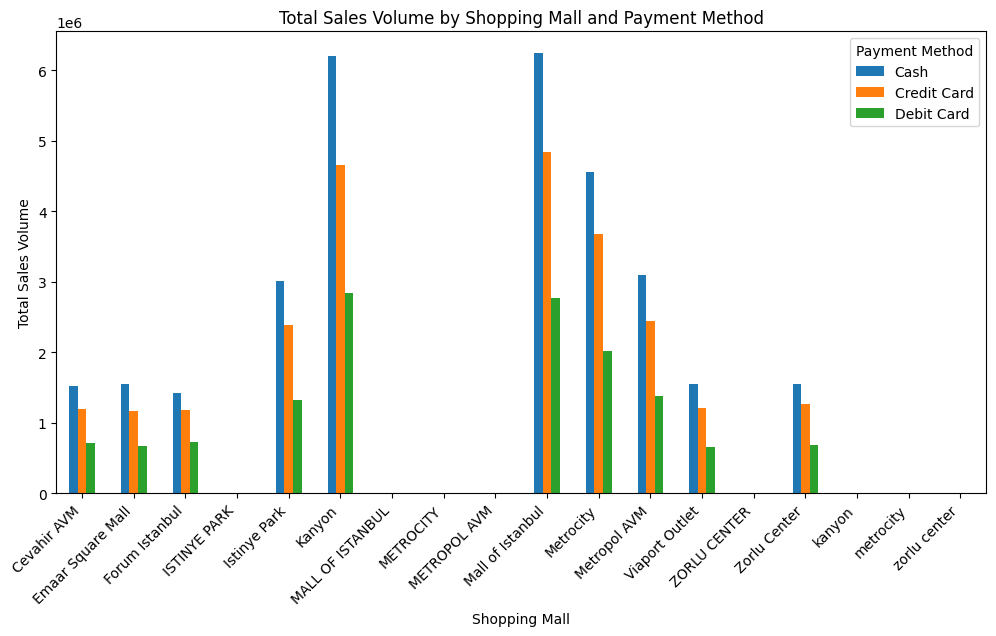

In [27]:
sales_by_mall_payment = df.groupby(['shopping_mall', 'payment_method'])['price'].sum()

print(sales_by_mall_payment)

sales_by_mall_payment.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales Volume by Shopping Mall and Payment Method')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Method')
plt.show()


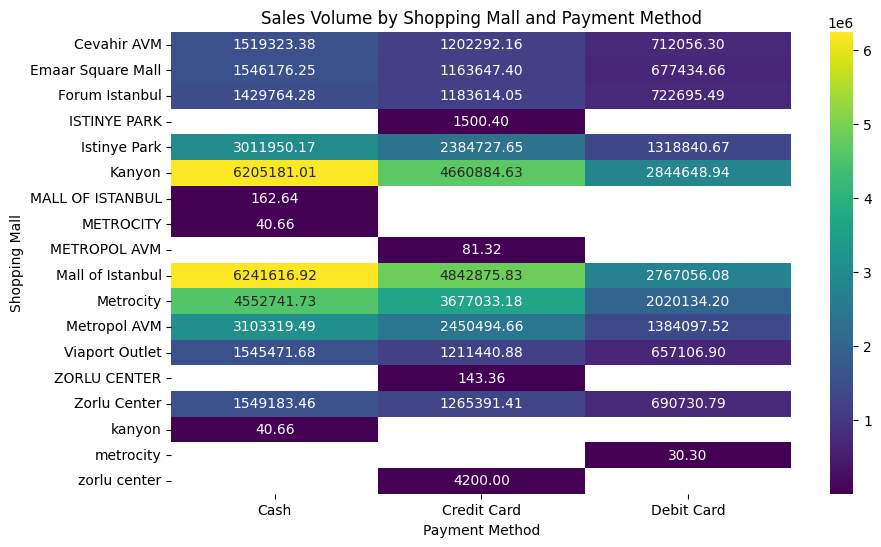

In [28]:
sales_pivot = df.groupby(['shopping_mall', 'payment_method'])['price'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title('Sales Volume by Shopping Mall and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Shopping Mall')
plt.show()


Learning and feature: If some malls show a higher preference for cash or cards, it can inform marketing strategies specific to those locations. Retain 'shopping_mall' and 'payment_method' to analyze their influence on purchasing trends.